In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
price_df = pd.read_csv('train_set_nostandardAA.csv')
price_t_df = pd.read_csv('test_set_nostandardAA.csv')

In [4]:
price_df.rename(columns={'date':'ds','predict':'y'},inplace=True)
price_df['ds'] = pd.to_datetime(price_df['ds'])
price_t_df.rename(columns = {'date':'ds','predict':'y'},inplace=True)
price_t_df['ds'] = pd.to_datetime(price_t_df['ds'])
#modify y in training set
price_df['y_orig'] = price_df['y']#将y_orig加入为最后一列
price_t_df['y_orig'] = price_t_df['y']
for i in range(len(price_df)):
    price_df.iloc[i,-2] += 1    #统一y+=1
for i in range(len(price_t_df)):
    price_t_df.iloc[i,-2] += 1
price_df['y'] = np.log(price_df['y'])  #对y取log
price_t_df['y'] = np.log(price_t_df['y'])
y_true = price_t_df['y_orig']  #保存测试集上真值

In [5]:
yhat = []
yhat_lower = []
yhat_upper = []

In [6]:
print(len(price_t_df))
#训练模型
model = Prophet(daily_seasonality=True) 
model.fit(price_df)
future_data = model.make_future_dataframe(periods=5, freq = 'd') #每次预测之后五天
forecast_data = model.predict(future_data)
#保存预测值
yhat.append(np.exp(forecast_data.loc[len(forecast_data)-5:len(forecast_data)-1,'yhat'])-1)
yhat_lower.append(np.exp(forecast_data.loc[len(forecast_data)-5:len(forecast_data)-1,'yhat_lower'])-1)
yhat_upper.append(np.exp(forecast_data.loc[len(forecast_data)-5:len(forecast_data)-1,'yhat_upper'])-1)
#更新数据
# for i in range(5):
#     price_df.loc[len(price_df)] = price_t_df.loc[0]  #将testset的第一行加入trainset的末尾
#     price_t_df = price_t_df.drop([0]).reset_index(drop = True) #删除testset第一行，并且更新index

475


D:\Anaconda\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
D:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [7]:
yhat_list = []
yhat_lower_list = []
yhat_upper_list = []
for i in yhat:
    yhat_list+=i.tolist()
for i in yhat_lower:
    yhat_lower_list+=i.tolist()
for i in yhat_upper:
    yhat_upper_list+=i.tolist()

In [8]:
result = pd.DataFrame({'yhat':yhat_list,'yhat_lower':yhat_lower_list,'yhat_upper':yhat_upper_list})

In [9]:
result

,yhat,yhat_lower,yhat_upper
0,0.565257,0.254037,0.972193
1,0.565374,0.248805,0.973481
2,0.565819,0.261960,0.950342
3,0.554459,0.239384,0.959032
4,0.553457,0.223613,0.927540


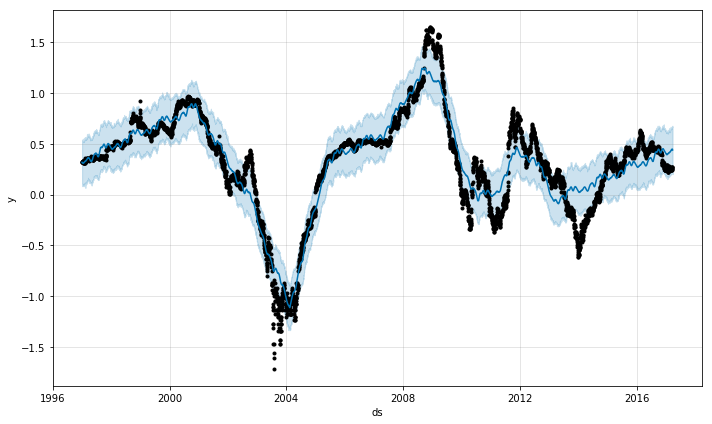

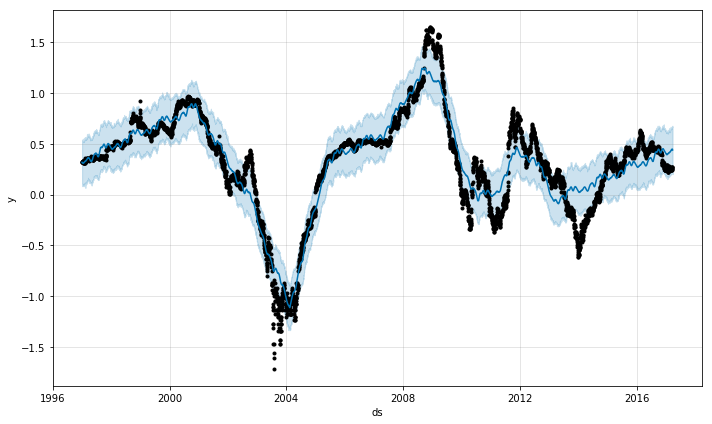

In [12]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
model.plot(forecast_data)